# tour API 크롤링

In [15]:
import pandas as pd 
import numpy as np
import time 
import random
from tqdm import tqdm
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import glob

In [126]:
driver=webdriver.Chrome()
driver.get('https://api.visitkorea.or.kr/#/hubTourSearch')
driver.implicitly_wait(10)
time.sleep(2)

In [ ]:
# 로그인

In [127]:
# 관광타입 선택
buttons = driver.find_elements(By.CLASS_NAME, 'btn-type2.btn-blue.floatright')
buttons[1].click()
time.sleep(2)

all_ = driver.find_element(By.NAME, 'contentTypeIdAll')
all_.click()
time.sleep(2)

check = driver.find_elements(By.CLASS_NAME, 'btn.btn-type2.btn-blue.ml10')
check[-1].click()
time.sleep(2)

# 지역 선택
buttons = driver.find_elements(By.CLASS_NAME, 'btn-type2.btn-blue.floatright')
buttons[3].click()
time.sleep(2)

driver.find_element(By.ID, 39).click()
time.sleep(2)

check = driver.find_elements(By.CLASS_NAME, 'btn.btn-type2.btn-blue.ml10')
check[1].click()
time.sleep(2)

# 검색 버튼
search = driver.find_element(By.CLASS_NAME, 'btn-type2.btn-blue.ml5')
search.click()
time.sleep(1+random.random())

# 200개씩 선택
s_1 = driver.find_element(By.CLASS_NAME, 'option-wrap.clearfix').find_elements(By.TAG_NAME, 'option')
s_1[-1].click()
time.sleep(1+random.random())
s_2 = driver.find_elements(By.CLASS_NAME, 'btn.btn-type2')
s_2[2].click()
time.sleep(1+random.random())

# 목록 선택
a = driver.find_element(By.CLASS_NAME, 'scroll-wrap').find_elements(By.CLASS_NAME, 'btn-wrap.floatleft')
a[0].click()
time.sleep(1+random.random())

# 전체 체크
b = driver.find_elements(By.CLASS_NAME, 'btn-type2.ml10.btn-iconback.check.btn-checkall')
b[0].click()
time.sleep(1+random.random())

# 텍스트 다운로드
c = driver.find_elements(By.CLASS_NAME, 'btn-type4.btn-iconback.excel')
c[0].click()
time.sleep(1+random.random())

# 활용 매체 선택 
d = driver.find_elements(By.ID, 'useWeb')
d[0].click()
time.sleep(1+random.random())

# 활용 내용
e = driver.find_elements(By.CLASS_NAME, 'use-text')
e[0].send_keys("제주도 관광 데이터 분석")
time.sleep(1+random.random())

# 작성 완료
f = driver.find_elements(By.CLASS_NAME, 'modal-foot')
f[0].click()
time.sleep(30+random.random())

In [128]:
def crawing_():
    # 전체 체크
    b = driver.find_elements(By.CLASS_NAME, 'btn-type2.ml10.btn-iconback.check.btn-checkall')
    b[0].click()
    time.sleep(1+random.random())

    # 텍스트 다운로드
    c = driver.find_elements(By.CLASS_NAME, 'btn-type4.btn-iconback.excel')
    c[0].click()
    time.sleep(30+random.random())

In [129]:
# 1 ~ 10페이지
page = driver.find_element(By.CLASS_NAME, 'paging').find_elements(By.TAG_NAME, 'button')
for i in tqdm(range(3, 12)):
    page[i].click()
    time.sleep(1+random.random())
    crawing_()

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [05:04<00:00, 33.87s/it]


In [132]:
# 페이지 넘기기
page = driver.find_element(By.CLASS_NAME, 'paging').find_elements(By.TAG_NAME, 'button')
page[-2].click()
time.sleep(2)

In [134]:
# 11 ~ 12 페이지
page = driver.find_element(By.CLASS_NAME, 'paging').find_elements(By.TAG_NAME, 'button')
for i in tqdm(range(2, 4)):
    page[i].click()
    time.sleep(1+random.random())
    crawing_()

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:08<00:00, 34.26s/it]


# 엑셀파일 합치기 -> csv 저장

In [3]:
files = glob.glob('../project/data/*')
files

['../project/data\\jeju (1).xlsx',
 '../project/data\\jeju (10).xlsx',
 '../project/data\\jeju (11).xlsx',
 '../project/data\\jeju (12).xlsx',
 '../project/data\\jeju (2).xlsx',
 '../project/data\\jeju (3).xlsx',
 '../project/data\\jeju (4).xlsx',
 '../project/data\\jeju (5).xlsx',
 '../project/data\\jeju (6).xlsx',
 '../project/data\\jeju (7).xlsx',
 '../project/data\\jeju (8).xlsx',
 '../project/data\\jeju (9).xlsx']

In [29]:
sheet_name = ['관광지', '문화시설', '레포츠', '숙박', '쇼핑', '음식점']

In [40]:
path='../project/data/'
for b in sheet_name:
    df=pd.DataFrame()
    for a in files:
        df_=pd.read_excel(a,sheet_name=b)
        df = pd.concat([df, df_])
    df.to_csv(f"{path}{b}.csv")

# 네이버 검색 & 워드클라우드

100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


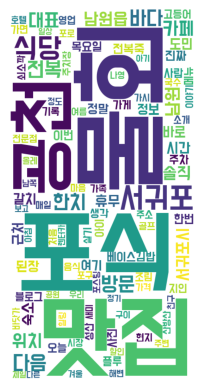

In [14]:
data = '공천포식당'

driver=webdriver.Chrome()
driver.get(f"https://search.naver.com/search.naver?where=view&sm=tab_jum&query=제주도+{data}+후기")
driver.implicitly_wait(10)

element = driver.find_element(By.TAG_NAME, "body")

# 페이지 스크롤
for _ in range(30):
    element.send_keys(Keys.PAGE_DOWN)
    time.sleep(random.random()/2)

texts = driver.find_element(By.CLASS_NAME, 'main_pack').text

driver.close()

total=[]

# 불용어 처리
drop_ = [data, '제주','제주도','여행','여행지','문서','저장','후기','관광지','관광','코스','추천']

okt = Okt()
for i in tqdm(okt.nouns(texts)):
    if len(i)>1: 
        if i not in drop_ : total.append(i)

# 빈도분석 라이브러리
result=Counter(total)

dic={}
for a in tqdm(result.most_common(100)):
    dic[a[0]]=a[1]

# 워드 클라우드
wc=WordCloud(width=400,
             height=800,  
             background_color='white', 
             font_path='./BMDOHYEON_ttf.ttf')
cloud=wc.generate_from_frequencies(dic)
plt.axis('off')
plt.imshow(cloud)

cloud.to_file("word_cloud.png")

100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


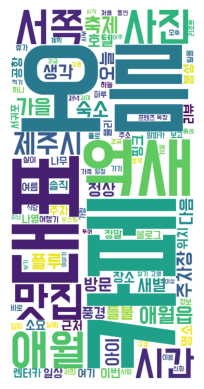